In [1]:
import sys
sys.path.append("..")
from glob import glob
import pandas as pd
import seaborn as sns

In [7]:
name = "MUTAG"
model = "CNN"

parent_paths = glob(f"../logs/{name}/{model}/*")
# for p in parent_paths:
    

In [8]:
p = parent_paths[0]

In [19]:
df = pd.DataFrame()
for path in glob(p + "/train_log/*.csv"):
    df = df.append(pd.read_csv(path))
df.reset_index(inplace=True)

In [20]:
a

,index


In [21]:
i = 0
name = "MUTAG"
#########################################################
for name in ["subset1", "poisson", "new_poisson"]:
    print("="*20)
    print(name)
    # concat csv
    i = 0
    df = pd.DataFrame()
    
    for model in ["CNN", "BrainCNN", "Deep_D1D2", "DGCNN", "GIN", "Deepsets"]:
        parent_paths = glob(f"../logs/{name}/{model}/*")

        for p in sorted(parent_paths):
            a = pd.DataFrame()
            for path in glob(p + "/train_log/*.csv"):
                a = a.append(pd.read_csv(path))
            a.reset_index(inplace=True)

            # print("="*20)
            # print(p.split("/")[-1])
            sort, resize, lr = p.split("/")[-1].split("_")

            for e in range(1, 50, 1):
                same_epoch = a.query("epoch==@e")
                ave_val_acc = same_epoch["val_acc"].mean()
                std_val_acc = same_epoch["val_acc"].std()
                # print(f"epoch {e+1} : {round(ave_val_acc*100, 2)} ± {round(std_val_acc*100, 2)}")

                df = df.append(
                    pd.Series({"model": model, "sort": sort, "resize": int(resize), "lr": float(lr),
                     "epoch": e, "ave_acc": ave_val_acc, "std_acc": std_val_acc
                    }, name=i)
                )

                i+=1

    ###################################################
    # search max value
    max_df = pd.DataFrame()

    g = df.groupby(["model", "sort"])
    for name, d in g:
        max_acc = d["ave_acc"].max()
        max_data = d.query("ave_acc==@max_acc")
    #     print(name, f"{round(max_data.ave_acc*100,2)} ± {round(max_data.std_acc*100,2)}")
        max_df = max_df.append(max_data)
    max_df.reset_index(inplace=True)

    for i in max_df.iterrows():
        print(i[1].model, i[1].sort, f"{round(i[1].ave_acc*100,2)} ± {round(i[1].std_acc*100, 2)}")

subset1
BrainCNN shuffle 85.21 ± 7.91
BrainCNN sort 98.28 ± 0.55
CNN shuffle 71.54 ± 1.94
CNN sort 99.14 ± 0.26
CNN sort 99.14 ± 0.25
DGCNN shuffle 97.39 ± 0.74
Deep_D1D2 shuffle 98.72 ± 0.59
Deep_D1D2 sort 99.15 ± 0.08
Deepsets shuffle 99.38 ± 0.17
GIN shuffle 99.27 ± 0.19
poisson
BrainCNN shuffle 80.22 ± 10.55
BrainCNN sort 99.27 ± 0.39
CNN shuffle 57.67 ± 23.05
CNN sort 99.87 ± 0.1
DGCNN shuffle 98.72 ± 1.18
Deep_D1D2 shuffle 68.36 ± 38.17
Deep_D1D2 sort 92.2 ± 24.12
Deepsets shuffle 83.18 ± 12.05
GIN shuffle 98.48 ± 0.7
new_poisson
BrainCNN shuffle 66.91 ± 6.47
BrainCNN sort 70.83 ± 5.41
CNN shuffle 77.73 ± 2.27
CNN sort 76.5 ± 2.13
DGCNN shuffle 94.19 ± 1.71
Deep_D1D2 shuffle 95.47 ± 1.89
Deep_D1D2 sort 95.48 ± 1.25
Deepsets shuffle 95.2 ± 1.29
GIN shuffle 94.2 ± 0.64


In [79]:
#########################################################
model = "Deep_D1D2"
i = 0
df = pd.DataFrame()
for name in ["MUTAG", "DD", "COLLAB", "REDDIT-BINARY", "poisson", "new_poisson", "subset1"]:
    parent_paths = glob(f"../logs/{name}/{model}/*")

    for p in sorted(parent_paths):
        a = pd.DataFrame()
        for path in glob(p + "/train_log/*.csv"):
            a = a.append(pd.read_csv(path))
        a.reset_index(inplace=True)

        # print("="*20)
        # print(p.split("/")[-1])
        sort, resize, lr = p.split("/")[-1].split("_")
        
        
        max_acc = 0
        for e in range(1,50):
            
            same_epoch = a.query("epoch==@e")
            ave_val_acc = same_epoch["val_acc"].mean()
            std_val_acc = same_epoch["val_acc"].std()
            
            max_acc = max(max_acc, ave_val_acc)
            
            df = df.append(
                pd.Series({"name": name, "model": model, "sort": sort, "resize": int(resize), "lr": float(lr),
                 "epoch": e, "ave_acc": ave_val_acc, "std_acc": std_val_acc
                }, name=i)
            )
            i+=1

poisson


In [102]:
df

,name,model,sort,resize,lr,epoch,ave_acc,std_acc
0,MUTAG,Deep_D1D2,shuffle,18.0,0.001,1.0,0.628655,0.133759
1,MUTAG,Deep_D1D2,shuffle,18.0,0.001,2.0,0.628655,0.133759
2,MUTAG,Deep_D1D2,shuffle,18.0,0.001,3.0,0.665497,0.076487
3,MUTAG,Deep_D1D2,shuffle,18.0,0.001,4.0,0.665497,0.076487
4,MUTAG,Deep_D1D2,shuffle,18.0,0.001,5.0,0.665497,0.076487
...,...,...,...,...,...,...,...,...
1367,subset1,Deep_D1D2,sort,100.0,0.010,45.0,0.249750,0.009376
1368,subset1,Deep_D1D2,sort,100.0,0.010,46.0,0.251200,0.007631
1369,subset1,Deep_D1D2,sort,100.0,0.010,47.0,0.249550,0.009968
1370,subset1,Deep_D1D2,sort,100.0,0.010,48.0,0.250350,0.008141


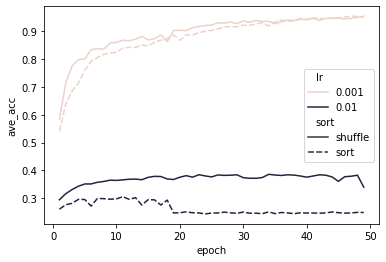

In [105]:
sns.lineplot(x="epoch", y="ave_acc", data=df.query("name=='new_poisson'"), hue="lr", style="sort")

In [72]:
for i in df.iterrows():
    print(i[1].model, i[1].sort, f"{round(i[1].ave_acc*100,2)} ± {round(i[1].std_acc*100, 2)}")

Deepsets shuffle 38.35 ± 7.13
Deepsets shuffle 42.93 ± 2.02
Deepsets shuffle 41.49 ± 4.48
Deepsets shuffle 40.15 ± 7.5
Deepsets shuffle 44.38 ± 5.87
Deepsets shuffle 43.81 ± 5.65
Deepsets shuffle 46.7 ± 3.43
Deepsets shuffle 48.01 ± 5.29
Deepsets shuffle 46.86 ± 3.95
Deepsets shuffle 49.82 ± 7.78
Deepsets shuffle 51.89 ± 8.88
Deepsets shuffle 53.48 ± 6.18
Deepsets shuffle 49.06 ± 8.36
Deepsets shuffle 53.95 ± 6.96
Deepsets shuffle 53.15 ± 6.23
Deepsets shuffle 52.85 ± 4.84
Deepsets shuffle 52.22 ± 12.44
Deepsets shuffle 53.23 ± 5.06
Deepsets shuffle 56.15 ± 7.42
Deepsets shuffle 53.3 ± 7.74
Deepsets shuffle 58.53 ± 9.08
Deepsets shuffle 59.82 ± 8.03
Deepsets shuffle 62.53 ± 10.35
Deepsets shuffle 61.51 ± 11.57
Deepsets shuffle 65.86 ± 12.84
Deepsets shuffle 65.18 ± 10.05
Deepsets shuffle 67.26 ± 12.04
Deepsets shuffle 69.09 ± 12.31
Deepsets shuffle 68.61 ± 13.95
Deepsets shuffle 72.62 ± 12.93
Deepsets shuffle 67.34 ± 11.88
Deepsets shuffle 71.21 ± 15.91
Deepsets shuffle 72.61 ± 13.95
D

In [9]:
df

,model,sort,resize,lr,epoch,ave_acc,std_acc
0,CNN,shuffle,100.0,0.001,9.0,0.56290,0.214309
1,CNN,shuffle,100.0,0.001,19.0,0.56010,0.216961
2,CNN,shuffle,100.0,0.001,29.0,0.55885,0.217899
3,CNN,shuffle,100.0,0.001,39.0,0.54785,0.210342
4,CNN,shuffle,100.0,0.001,49.0,0.54860,0.209242
5,CNN,shuffle,100.0,0.010,9.0,0.24875,0.007875
6,CNN,shuffle,100.0,0.010,19.0,0.24810,0.008634
7,CNN,shuffle,100.0,0.010,29.0,0.24875,0.007103
8,CNN,shuffle,100.0,0.010,39.0,0.25095,0.008652
9,CNN,shuffle,100.0,0.010,49.0,0.25210,0.007430


In [124]:
sns.lineplot(x="epoch", y="train_loss", data=df, hue="fold")

ValueError: Could not interpret value `train_loss` for parameter `y`

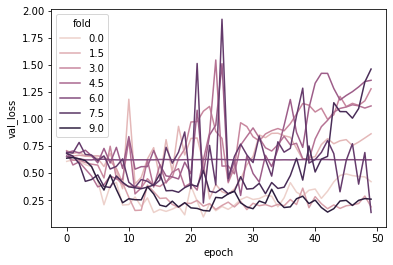

In [23]:
sns.lineplot(x="epoch", y="val_loss", data=df, hue="fold")

In [48]:
import networkx as nx
import numpy as np
from tqdm import tqdm

In [112]:
df = pd.DataFrame()
i = 0
for kind in ["BA", "Growth", "Attach", "Random"]:
    paths = glob(f"../graph_data/new_poisson/graph/{kind}/*")
    for p in tqdm(paths):
        G = nx.read_adjlist(p)
        ave_degs = np.average([d[1] for d in list(G.degree())])
        num_edge = nx.number_of_edges(G)
        num_node = nx.number_of_nodes(G)   
        df = df.append(pd.Series({"kind":kind,"node" : num_node, "edges": num_edge, "ave_deg": ave_degs}, name=i))
        i+=1

100%|██████████| 5000/5000 [00:14<00:00, 352.19it/s]


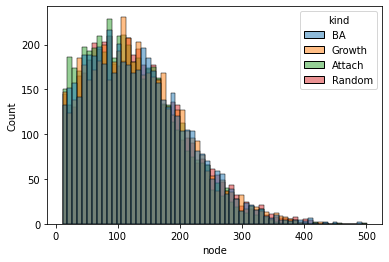

In [113]:
sns.histplot(x="node",data=df,hue="kind")

In [115]:
df["node"].max()

501.0